# Import Modules

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns


# Importing Dataset

In [82]:
df= sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Pre-processing Dataset

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Correlation Matrix

In [14]:
corr=df.corr()

<AxesSubplot:>

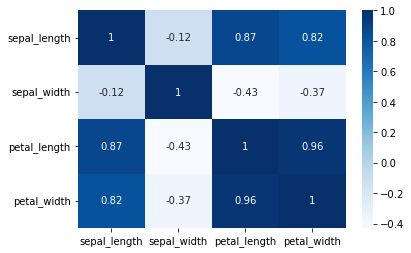

In [25]:
sns.heatmap(corr, annot=True, cmap='Blues')

# Label Encoding

In [35]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
species=df['species']
le.fit(species)
df['species']=le.transform(species)

In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Training-Testing Dataset Separation

In [42]:
x=df.iloc[:,0:-1]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)
y_predict= model.predict(x_test)
y_predict

array([2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1])

In [68]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict,y_test)

array([[ 7,  0,  0],
       [ 0,  6,  2],
       [ 0,  1, 14]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       0.86      0.75      0.80         8\n           2       0.88      0.93      0.90        15\n\n    accuracy                           0.90        30\n   macro avg       0.91      0.89      0.90        30\nweighted avg       0.90      0.90      0.90        30\n'

# KNN Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predict= knn.predict(x_test)
y_predict

array([2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1])

In [72]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9333333333333333


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict,y_test)

array([[ 7,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 14]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       1.00      0.78      0.88         9\n           2       0.88      1.00      0.93        14\n\n    accuracy                           0.93        30\n   macro avg       0.96      0.93      0.94        30\nweighted avg       0.94      0.93      0.93        30\n'

# Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_predict=DT.predict(x_test)
y_predict

array([2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1])

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9333333333333333


In [79]:
confusion_matrix(y_predict,y_test)

array([[ 7,  0,  0],
       [ 0,  6,  1],
       [ 0,  1, 15]], dtype=int64)

In [80]:
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       0.86      0.86      0.86         7\n           2       0.94      0.94      0.94        16\n\n    accuracy                           0.93        30\n   macro avg       0.93      0.93      0.93        30\nweighted avg       0.93      0.93      0.93        30\n'

# Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(8)
RFC.fit(x_train,y_train)
y_predict=RFC.predict(x_test)
y_predict


array([2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1])

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9


In [96]:
confusion_matrix(y_predict, y_test)

array([[ 7,  0,  0],
       [ 0,  6,  2],
       [ 0,  1, 14]], dtype=int64)

In [98]:
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       0.86      0.75      0.80         8\n           2       0.88      0.93      0.90        15\n\n    accuracy                           0.90        30\n   macro avg       0.91      0.89      0.90        30\nweighted avg       0.90      0.90      0.90        30\n'

In [100]:
RFC.score(x_test,y_test)

0.9

# # Conclusion:
KNN Classifier is best algorithm for the species classification for given dataset.
